In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('/content/raw.csv')
print(df.to_string())

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0    female        group B           bachelor's degree      standard                    none          72             72             74
1    female        group C                some college      standard               completed          69             90             88
2    female        group B             master's degree      standard                    none          90             95             93
3      male        group A          associate's degree  free/reduced                    none          47             57             44
4      male        group C                some college      standard                    none          76             78             75
5    female        group B          associate's degree      standard                    none          71             83             78
6    female        group B                some college 

#Checking whether null values are present in the set

In [65]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


#Created a file using cleaned data

In [66]:
df.to_csv('/content/clean.csv')

In [67]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [68]:
df["Average"]=(df["math score"]+df["reading score"]+df["writing score"])/3
print(df["Average"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64


# Pie chart

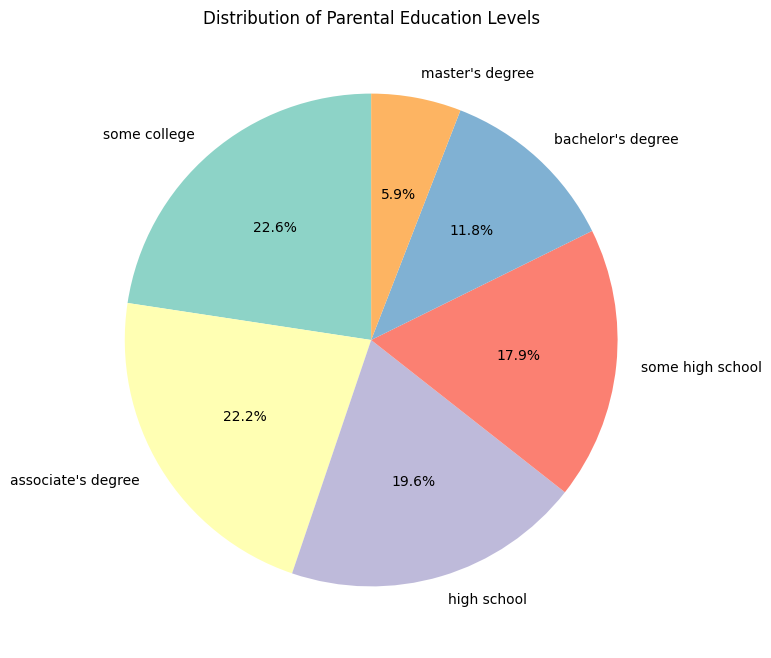

In [69]:
plt.figure(figsize=(10, 8))
education_levels = df['parental level of education'].value_counts()
plt.pie(education_levels, labels=education_levels.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(education_levels)))
plt.title('Distribution of Parental Education Levels')
plt.show()

#The pie chart showing parental levels of education highlights the distribution of students according to their parents' educational backgrounds. It offers a glimpse into the variety of educational experiences within students' families.

#Bar chart

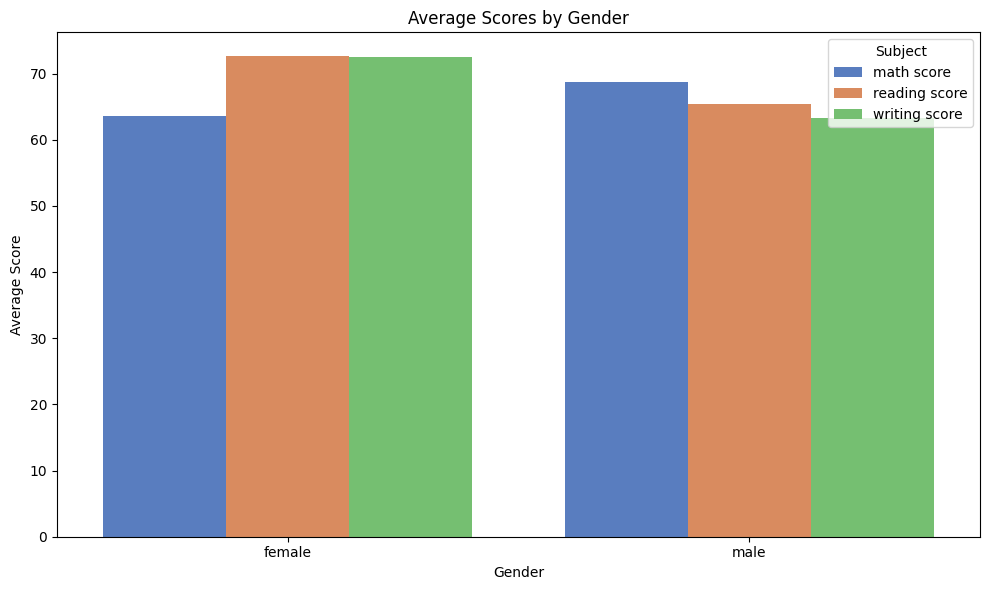

In [70]:
plt.figure(figsize=(10, 6))
avg_scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
avg_scores_melted = avg_scores_by_gender.reset_index().melt(id_vars='gender', value_vars=['math score', 'reading score', 'writing score'], var_name='Subject', value_name='Average Score')
sns.barplot(x='gender', y='Average Score', hue='Subject', data=avg_scores_melted, palette='muted')
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

#The bar chart displaying average scores by gender allows for a comparison of male and female students' performance in math, reading, and writing. It provides a clear view of any gender-related differences or similarities in academic achievement across these subjects.

#Box chart

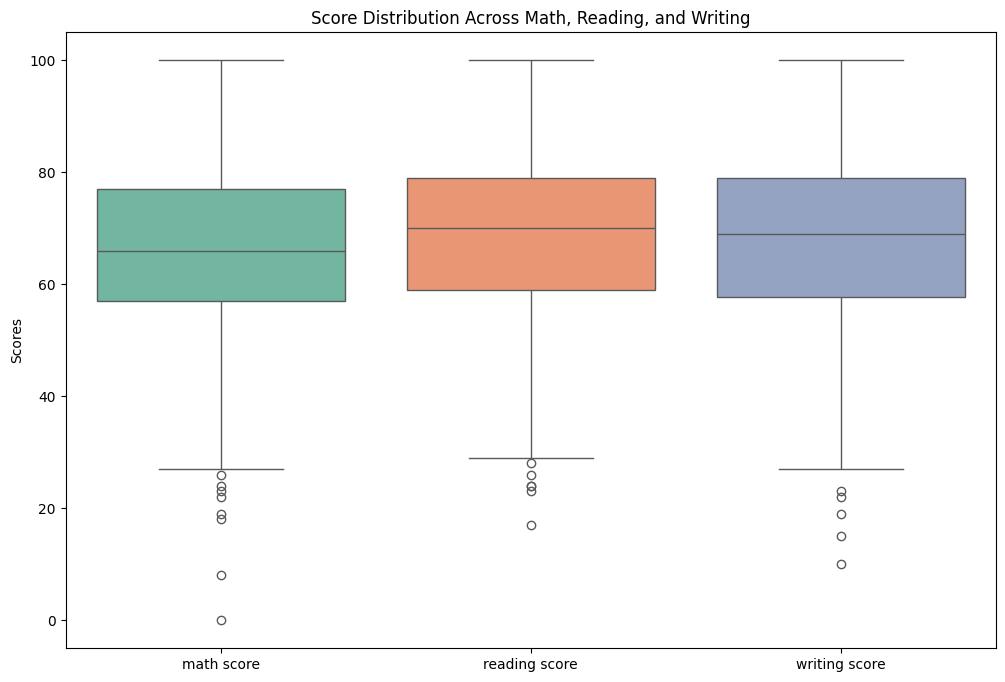

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], palette='Set2')
plt.title('Score Distribution Across Math, Reading, and Writing')
plt.ylabel('Scores')
plt.show()

#The box plot displays the distribution of scores for each subject, emphasizing the median values and identifying any potential outliers. It provides a quick overview of score variability and the range of performance in math, reading, and writing.

#Heat Map

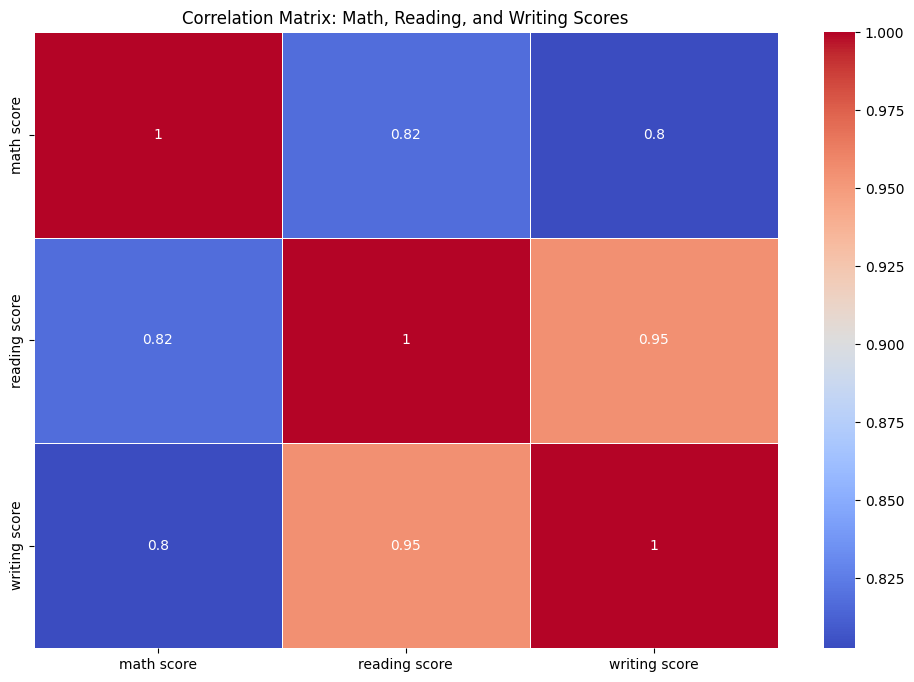

In [72]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Math, Reading, and Writing Scores')
plt.show()


#The heatmap displays the relationships between math, reading, and writing scores, highlighting the strength and direction of their correlations. It provides a clear view of how performance in one subject correlates with performance in the others.

#scatter plot

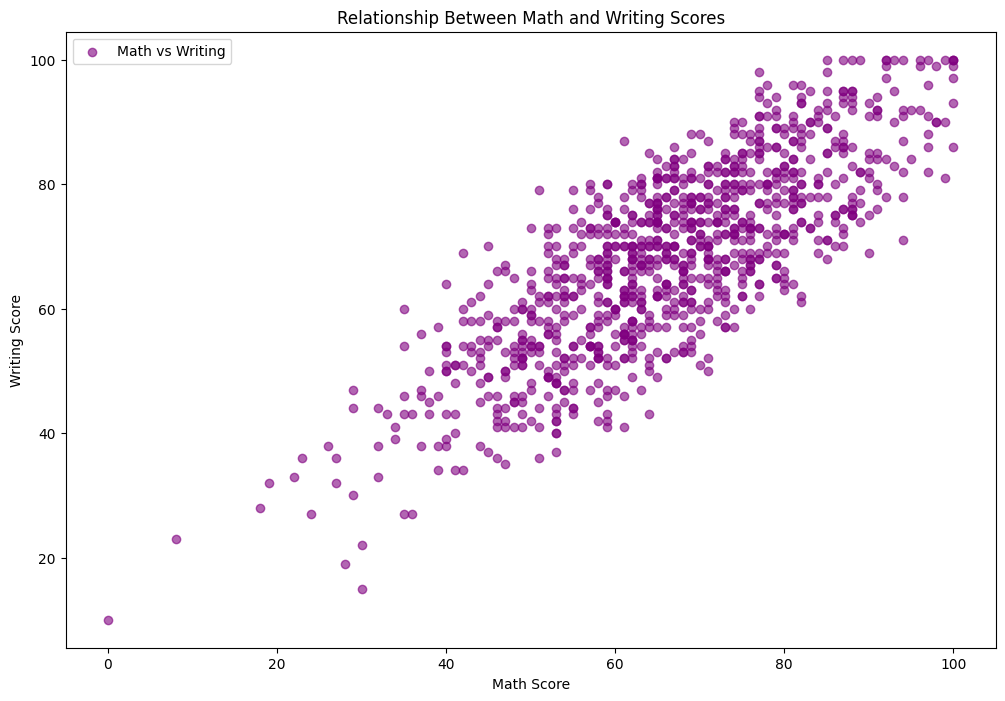

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(df['math score'], df['writing score'], label='Math vs Writing', alpha=0.6, color='purple')
plt.title('Relationship Between Math and Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.legend(loc='upper left')
plt.show()

#The scatter plot illustrates the relationship between math and writing scores for each student, making it easier to observe any patterns or correlations in performance across these two subjects.